# Lab 2

#### Simon Jasansky

## Exercise 1

In [37]:
# import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# import data
exp1 = list()
exp1.append(pd.read_csv("data/exp1a.csv"))
exp1.append(pd.read_csv("data/exp1b.csv"))
exp1.append(pd.read_csv("data/exp1c.csv"))

,x,y,class
0,0.62945,0.288640,1
1,0.81158,-0.242780,1
2,-0.74603,0.623160,1
3,0.82675,0.065651,1
4,0.26472,-0.298550,1
...,...,...,...
395,-1.90060,1.803200,-1
396,1.34870,1.020600,-1
397,1.88600,0.969620,-1
398,-1.77230,1.324500,-1


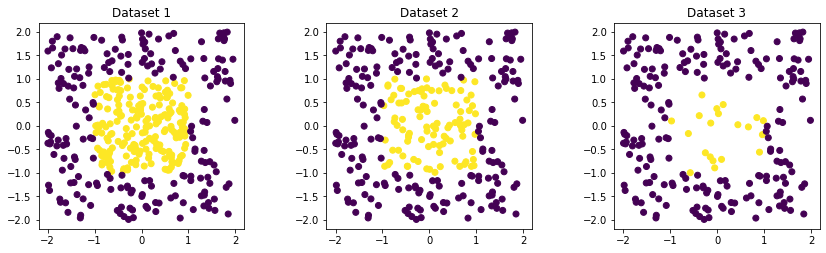

In [61]:
# plot the data
fig = plt.figure(figsize= (14,14))
fig.subplots_adjust(hspace=0.5, wspace=0.4)

for i in range(0, len(exp1)):
    ax = fig.add_subplot(1, 3, i+1)
    ax.scatter(exp1[i]["x"], exp1[i]["y"],
               c = exp1[i]["class"])
    ax.set_title("Dataset " + str(i+1))
    ax.set(adjustable="box", aspect="equal")

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


accuracy_l = list()
conf_mat_l = list()

accuracy_df = pd.DataFrame(columns = ["dataset1", "dataset2", "dataset3"])
conf_mt_df = pd.DataFrame

# do knn with 10-fold Cross-Validation
for i in range(0, len(exp1)):
    #print("Dataset: " + str(i+1))

    X = np.array(exp1[i][["x", "y"]])
    Y = np.array(exp1[i]["class"])

    accuracy_temp = list()
    conf_mat_temp = list()

    for k in [1,5,11,21]:
        #print("k = " + str(k))
        knn = KNeighborsClassifier(n_neighbors = k)
        Y_pred = cross_val_predict(knn, X, Y, cv = 10)
        conf_mat = confusion_matrix(Y, Y_pred)
        accuracy = accuracy_score(Y, Y_pred)
        accuracy_temp.append(accuracy)
        conf_mat_temp.append(conf_mat)
    accuracy_l.append(np.around(np.array(accuracy_temp), 3)) # round accuracy rates
    conf_mat_l.append(conf_mat_temp)

# build accuracy table
accuracy_df = pd.DataFrame(data = accuracy_l,
                           columns = ["k = 1", "k = 5", "k = 11", "k = 21"],
                           index = ["Dataset 1", "Dataset 2", "Dataset 3"])

# build the confusion matrix table
conf_mat_df = pd.DataFrame(data = conf_mat_l,
                           columns = ["k = 1", "k = 5", "k = 11", "k = 21"],
                           index = ["Dataset 1", "Dataset 2", "Dataset 3"])

In [140]:
accuracy_df.transpose()

,Dataset 1,Dataset 2,Dataset 3
k = 1,0.978,0.960,0.941
k = 5,0.952,0.967,0.977
k = 11,0.942,0.947,0.945
k = 21,0.928,0.940,0.936


In [ ]:
# visualizing accuracy and the confusion matrices

fig, ax = plt.subplots(nrows = 3, ncols = 4, figsize = (10,10))

for i in range(3):
    for j in range(4):
        ax[i, j].text(0.5, 0.5, conf_mat_df.iat[i, j],
                      fontsize=18, ha='center')
        ax[i, j].subplot()





In [150]:
print(conf_mat_df.transpose())
conf_mat_df.transpose().iat[0, 2]

                    Dataset 1             Dataset 2            Dataset 3
k = 1    [[194, 6], [3, 197]]   [[193, 7], [5, 95]]  [[194, 6], [7, 13]]
k = 5   [[183, 17], [2, 198]]   [[194, 6], [4, 96]]  [[200, 0], [5, 15]]
k = 11  [[177, 23], [0, 200]]  [[190, 10], [6, 94]]  [[200, 0], [12, 8]]
k = 21  [[171, 29], [0, 200]]  [[190, 10], [8, 92]]  [[200, 0], [14, 6]]


array([[194,   6],
       [  7,  13]], dtype=int64)

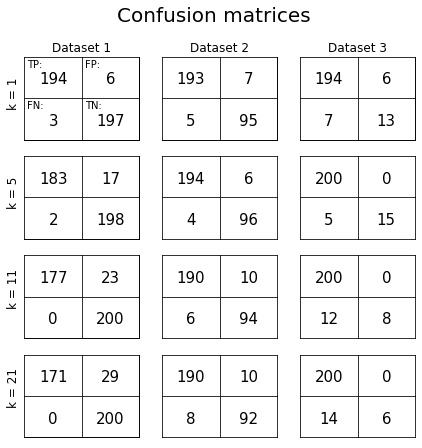

In [237]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(7, 7))
outer = gridspec.GridSpec(4, 3, wspace=0.2, hspace=0.2)
fig.suptitle("Confusion matrices", size = "20")

x_outer = [0,0,0,1,1,1,2,2,2,3,3,3]
y_outer = [0,1,2,0,1,2,0,1,2,0,1,2]
x_inner = [0,0,1,1]
y_inner = [0,1,0,1]

sub_titles_x = ["Dataset 1", "Dataset 2", "Dataset 3"]
sub_titles_y = ["k = 1", "k = 5", "k = 11", "k = 21"]
k_count = 0

for i in range(12):
    inner = gridspec.GridSpecFromSubplotSpec(2, 2,
                                             subplot_spec=outer[i],
                                             wspace=0, hspace=0)
    if i in [0,1,2]:
        ax1 = plt.Subplot(fig, outer[i])
        ax1.set_title(sub_titles[i], size = 12)
        ax1.set_xticks([])
        ax1.set_yticks([])
        fig.add_subplot(ax1)

    if i in [0,3,6,9]:
        ax2 = plt.Subplot(fig, outer[i])
        ax2.text(-0.15, 0.4, sub_titles_y[k_count],
                 rotation = 90, size = 12)
        ax2.set_xticks([])
        ax2.set_yticks([])
        fig.add_subplot(ax2)
        k_count += 1

    for j in range(4):
        ax = plt.Subplot(fig, inner[j])
        t = ax.text(0.5,0.35,
                    conf_mat_df.transpose().iat[x_outer[i], y_outer[i]][x_inner[j], y_inner[j]],
                    size = 15)
        t.set_ha('center')
        ax.set_xticks([])
        ax.set_yticks([])
        if x_outer[i] == 0 and y_outer[i] == 0:
            if x_inner[j] == 0 and y_inner[j] == 0:
                ax.text(0.05, 0.75, "TP:", size = 10)
            if x_inner[j] == 0 and y_inner[j] == 1:
                ax.text(0.05, 0.75, "FP:", size = 10)
            if x_inner[j] == 1 and y_inner[j] == 0:
                ax.text(0.05, 0.75, "FN:", size = 10)
            if x_inner[j] == 1 and y_inner[j] == 1:
                ax.text(0.05, 0.75, "TN:", size = 10)


        fig.add_subplot(ax)

for 1.1 a and b: build table with datasets on x axis, k-fold on y axis

1 table for both questions, for b reason over rows, for c reason over columns